# Supervised Sentiment Analysis: Word2Vec as an input into Logistic Regression on IMDB Movie Dataset


### We will start by splitting the dataset into 80%/20% train/test splits and applying minimum pre-processing into the text reviews. Experience shows that, word2vec algorithm tends to perform the best with minimum preprocessing.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
### reading dataset
df_imdb = pd.read_csv("IMDB_Dataset.csv")

reviews = df_imdb["review"]
sentiments = df_imdb["sentiment"]

### Dividing into train and test
reviews_train, reviews_test, sentiments_train, sentiments_test = train_test_split(reviews, sentiments,
                                   random_state=8933,
                                   test_size=0.20,
                                   shuffle=True)


In [ ]:
### Extracting reviews into a list of reviews
reviews_list_train = list(reviews_train)
reviews_list_train

['If you fast forward through the horrible singing, you will find a classic fairy tale underneath. Christopher Walken is very humorous and surprisingly good in the role. His trademark style of acting works well for the sly Puss in Boots. The other actors are well for their parts. I did not find any of the acting terribly fake or awkward. The king in particular appears a real dunce though, and I wonder if he is supposed to be. I can not remember the original tale. The special effects are typical of the eighties, but at least they are not overly fake like some of the computer generated fare that we see today. Overall, I recommend this movie for children and adults who are a child at heart.',
 "Unbelievable!<br /><br />this film gets a 7 out 0f 10. This has to be one of the worst films i have seen in years. not only was the acting incredibly bad, the storyline (if you can call it that) was just as bad. Offcourse everyone knows what's going to happen within the first 5 minutes. Which is no

In [ ]:
### simple_preprocess does basic pre-processing such as tokenization, lowercasing, etc. and returns back a list of tokens (words).
### Contrary to BOW, it has been found that little to no preprocessing performs best for word2vec.
for i in range(len(reviews_list_train)):
    reviews_list_train[i] = gensim.utils.simple_preprocess(reviews_list_train[i])


#### The Word2vec module is available directly in Python from the library gensim. Notice that there are several parameters you can customize (size, window, min_count, sg). By default, size (defining the output vector dimensions) is set to 100, window to 5, min_count to 5, and sg to 0 (i.e. continuous bag of words). After developing our embeddings, we will use them as an input into downstream models – in this case, logistic regression for all subparts – for sentiment analysis. We will Make sure to use sg = 1 (specifying skip-gram) for all models in this notebook.

#### Maintaining the default parameters (except sg = 1),  we will generate word embeddings of dimension 100. For each review, average the embedding vectors for each word to create an overall vector representing its text. After that,we will run logistic regression to classify each review and assess model's performance using train and test accuracies.


In [ ]:
imdb_model = gensim.models.Word2Vec(reviews_list_train, vector_size=100, window=5, min_count=5, sg=1, workers=10)
imdb_model.train(reviews_list_train, total_examples=len(reviews_list_train), epochs=10)

2023-03-13 00:55:19,067 : INFO : collecting all words and their counts
2023-03-13 00:55:19,078 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 00:55:20,165 : INFO : PROGRESS: at sentence #10000, processed 2222974 words, keeping 51349 word types
2023-03-13 00:55:21,139 : INFO : PROGRESS: at sentence #20000, processed 4455938 words, keeping 68523 word types
2023-03-13 00:55:21,782 : INFO : PROGRESS: at sentence #30000, processed 6710535 words, keeping 80941 word types
2023-03-13 00:55:22,401 : INFO : collected 90934 word types from a corpus of 8954936 raw words and 40000 sentences
2023-03-13 00:55:22,403 : INFO : Creating a fresh vocabulary
2023-03-13 00:55:22,765 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 35603 unique words (39.15% of original 90934, drops 55331)', 'datetime': '2023-03-13T00:55:22.764943', 'gensim': '4.3.1', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]', 'plat

(67359469, 89549360)

In [ ]:
### Creating embeddings for each train review by averaging the embeddings of words in that review
review2vec = []
for i in range(len(reviews_list_train)):
    review_vector = []
    for word in reviews_list_train[i]:
        if word in imdb_model.wv:
            review_vector.append(imdb_model.wv[word])
    review2vec.append(np.mean(review_vector, axis=0))

review2vec

[array([-0.15894637,  0.18179499,  0.03609215, -0.05862331, -0.04319357,
        -0.24036528,  0.10812727,  0.32982323,  0.03782672, -0.14881359,
        -0.11061662, -0.20573902, -0.03342015,  0.0599854 ,  0.08823766,
        -0.04800568,  0.06770501, -0.107709  , -0.09853771, -0.3145326 ,
         0.14447384,  0.14730224,  0.20880052, -0.0392796 ,  0.0197233 ,
         0.04317336, -0.11037778, -0.04782044, -0.17041153,  0.07828423,
         0.09288884, -0.04735661,  0.05554468, -0.24782373, -0.07472576,
         0.09500626, -0.11525805, -0.08790369, -0.05029304, -0.25235927,
         0.01760759, -0.08825039, -0.0221866 , -0.09217261,  0.16556832,
        -0.09115078, -0.14921834, -0.14264132,  0.13059603,  0.09425613,
        -0.12936802, -0.00679975, -0.06491391,  0.03533885, -0.03729675,
        -0.04952379,  0.12126557, -0.07211559, -0.14076823,  0.05308522,
         0.11195195, -0.11440912,  0.06813593, -0.00146233, -0.08458056,
         0.15327267, -0.03064546,  0.10712592, -0.1

In [ ]:
len(review2vec) == len(reviews_list_train)

True

In [ ]:
reviews_list_test = list(reviews_test)

for i in range(len(reviews_list_test)):
    reviews_list_test[i] = gensim.utils.simple_preprocess(reviews_list_test[i])

In [ ]:
### Creating embeddings for each test review by averaging the embeddings of words in that review
review2vec_test = []
for i in range(len(reviews_list_test)):
    review_vector = []
    for word in reviews_list_test[i]:
        if word in imdb_model.wv:
            review_vector.append(imdb_model.wv[word])
    review2vec_test.append(np.mean(review_vector, axis=0))

review2vec_test

[array([-0.09624107,  0.19951376,  0.04846355, -0.01333784, -0.01071035,
        -0.23451217,  0.14117509,  0.3314908 ,  0.05071761, -0.09343308,
        -0.12422926, -0.14956048, -0.02831953,  0.12326297,  0.11039557,
         0.0503029 ,  0.05457968, -0.06054826, -0.11098158, -0.32162514,
         0.08063926,  0.11534191,  0.16266888, -0.07884309,  0.02377517,
         0.03374103, -0.15274706, -0.03150894, -0.22004557,  0.04007936,
         0.13693908, -0.05878053,  0.03131764, -0.17013021, -0.05714465,
         0.1651554 , -0.01223273, -0.12173498, -0.03125241, -0.22978133,
         0.07002021, -0.13002685, -0.03245442, -0.09809769,  0.1730963 ,
        -0.11436573, -0.23122518, -0.09883383,  0.14916544,  0.11799693,
        -0.01597763, -0.08101656, -0.05027767, -0.00658175, -0.02396748,
         0.04525356,  0.13190222, -0.07140093, -0.16891636,  0.13537525,
         0.05758729, -0.01248665,  0.06879671,  0.05745628, -0.11762983,
         0.16311213, -0.09902034,  0.04747253, -0.1

In [ ]:
print(len(review2vec_test))
print(len(review2vec_test) == len(reviews_list_test))

10000
True


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
### Label encoding the output variable
lb = LabelEncoder()
y_train = lb.fit_transform(sentiments_train)

In [ ]:
### Fitting a Logistic Regression
clf = LogisticRegression()
clf.fit(review2vec, y_train)

LogisticRegression()

In [ ]:
### Predicting y based on test set
y_pred = clf.predict(review2vec_test)

In [ ]:
### Encoding y-test
y_test = lb.fit_transform(sentiments_test)

In [ ]:
### getting the accuracy score
score = accuracy_score(y_test, y_pred)
print(score)

0.8697


In [ ]:
### Alternate way to get test accuracy score
score_test_100 = clf.score(review2vec_test, y_test)
print(f"Test Accuracy Score: {score_test_100}")

Test Accuracy Score: 0.8697


In [ ]:
### Alternate way to get train accuracy score
score_train_100 = clf.score(review2vec, y_train)
print(f"Train Accuracy Score: {score_train_100}")

Train Accuracy Score: 0.873675


### Train and Test accuracies are 87.4% and 87% respectively.
#### Since the data is balanced, accuracy is approprite measure for model quality

### Now, maintaining all other parameters as defaults, we will vary size between [25, 50, 100, 150] and Plot size vs. train and test accuracy. We will briefly comment on how changing this parameter impacts model performance, intuitively as well as specifically for this dataset.

In [ ]:
### Recreate word embeddings using a word2vec model with size argument 50
imdb_model_50 = gensim.models.Word2Vec(reviews_list_train, vector_size=50, window=5, min_count=5, sg=1, workers=10)
imdb_model_50.train(reviews_list_train, total_examples=len(reviews_list_train), epochs=10)

2023-03-13 14:30:41,912 : INFO : collecting all words and their counts
2023-03-13 14:30:41,936 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 14:30:45,605 : INFO : PROGRESS: at sentence #10000, processed 2222974 words, keeping 51349 word types
2023-03-13 14:30:48,102 : INFO : PROGRESS: at sentence #20000, processed 4455938 words, keeping 68523 word types
2023-03-13 14:30:50,650 : INFO : PROGRESS: at sentence #30000, processed 6710535 words, keeping 80941 word types
2023-03-13 14:30:53,181 : INFO : collected 90934 word types from a corpus of 8954936 raw words and 40000 sentences
2023-03-13 14:30:53,183 : INFO : Creating a fresh vocabulary
2023-03-13 14:30:53,519 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 35603 unique words (39.15% of original 90934, drops 55331)', 'datetime': '2023-03-13T14:30:53.513857', 'gensim': '4.3.1', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]', 'plat

(67359104, 89549360)

In [ ]:
### Creating embeddings for each train review by averaging the embeddings of words in that review
review2vec_50 = []
for i in range(len(reviews_list_train)):
    review_vector = []
    for word in reviews_list_train[i]:
        if word in imdb_model_50.wv:
            review_vector.append(imdb_model_50.wv[word])
    review2vec_50.append(np.mean(review_vector, axis=0))

review2vec_50

[array([-0.05360467,  0.04017622, -0.01843222,  0.08845329,  0.08807576,
        -0.1167737 ,  0.3086851 ,  0.30520377, -0.17513259, -0.09510483,
        -0.14889185, -0.1729332 ,  0.08171438,  0.04415439, -0.08339597,
         0.08648042,  0.04837195,  0.08711035, -0.38542426, -0.14045738,
         0.23484184,  0.15725686,  0.5638673 ,  0.02794946,  0.19111347,
         0.12572056, -0.1361497 ,  0.06635414, -0.3551855 , -0.02300806,
        -0.05965887, -0.19231082,  0.07046456,  0.03238704, -0.0842334 ,
         0.05086795,  0.20949307,  0.14606746,  0.1318617 ,  0.03083613,
         0.11906084, -0.03351877, -0.06131942,  0.10649183,  0.3313959 ,
        -0.0573553 , -0.01601433, -0.2400684 ,  0.20821078, -0.09288525],
       dtype=float32),
 array([ 0.00754918,  0.02697483, -0.03816423,  0.01141095,  0.07198852,
        -0.15826626,  0.23314217,  0.24520779, -0.2804475 , -0.079247  ,
        -0.07786243, -0.21698454,  0.217562  ,  0.06562574, -0.12913798,
         0.14621833,  0.168

In [ ]:
len(review2vec_50) == len(reviews_list_train)

True

In [ ]:
review2vec_test_50 = []
for i in range(len(reviews_list_test)):
    review_vector = []
    for word in reviews_list_test[i]:
        if word in imdb_model_50.wv:
            review_vector.append(imdb_model_50.wv[word])
    review2vec_test_50.append(np.mean(review_vector, axis=0))

review2vec_test_50

[array([-0.04937172,  0.11300332,  0.06953971,  0.17961119,  0.02274239,
        -0.09984623,  0.22659515,  0.3846173 , -0.22624347, -0.07311149,
        -0.12283535, -0.15555976,  0.1314133 ,  0.01240352, -0.05207841,
        -0.01014306,  0.06388188,  0.15993905, -0.39464787, -0.19258085,
         0.1616915 ,  0.09880819,  0.53006375,  0.02201126,  0.13209501,
         0.11338025, -0.10108915,  0.03128994, -0.25747374,  0.00599606,
        -0.08262324, -0.1851502 , -0.01119783,  0.09757699,  0.0068356 ,
         0.0794233 ,  0.21027054,  0.14556657,  0.04732981,  0.03457841,
         0.03359986, -0.10942675, -0.03067551,  0.16062587,  0.4072879 ,
        -0.09596497, -0.08744283, -0.32370022,  0.09073692,  0.01511725],
       dtype=float32),
 array([ 0.00293263, -0.01638637, -0.03400986,  0.08431681,  0.04579302,
        -0.13883282,  0.251995  ,  0.25913355, -0.16660552, -0.09615948,
        -0.09518486, -0.15555818,  0.18651846,  0.07669811, -0.10715736,
         0.11106156,  0.084

In [ ]:
len(review2vec_test_50)==len(reviews_list_test)

True

In [ ]:
clf2 = LogisticRegression()
clf2.fit(review2vec_50, y_train)

LogisticRegression()

In [ ]:
### Alternate way to get test accuracy score
score_test_50 = clf2.score(review2vec_test_50, y_test)
print(f"Test Accuracy Score: {score_test_50}")

Test Accuracy Score: 0.8564


In [ ]:
### Alternate way to get Train accuracy score
score_train_50 = clf2.score(review2vec_50, y_train)
print(f"Train Accuracy Score: {score_train_50}")

Train Accuracy Score: 0.86385


In [ ]:
### Recreate word embeddings using a word2vec model with size argument 25
imdb_model_25 = gensim.models.Word2Vec(reviews_list_train, vector_size=25, window=5, min_count=5, sg=1, workers=10)
imdb_model_25.train(reviews_list_train, total_examples=len(reviews_list_train), epochs=10)

2023-03-13 15:03:50,941 : INFO : collecting all words and their counts
2023-03-13 15:03:50,954 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 15:03:53,156 : INFO : PROGRESS: at sentence #10000, processed 2222974 words, keeping 51349 word types
2023-03-13 15:03:54,260 : INFO : PROGRESS: at sentence #20000, processed 4455938 words, keeping 68523 word types
2023-03-13 15:03:55,275 : INFO : PROGRESS: at sentence #30000, processed 6710535 words, keeping 80941 word types
2023-03-13 15:03:55,873 : INFO : collected 90934 word types from a corpus of 8954936 raw words and 40000 sentences
2023-03-13 15:03:55,874 : INFO : Creating a fresh vocabulary
2023-03-13 15:03:56,156 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 35603 unique words (39.15% of original 90934, drops 55331)', 'datetime': '2023-03-13T15:03:56.156823', 'gensim': '4.3.1', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]', 'plat

(67360518, 89549360)

In [ ]:
### Creating embeddings for each train review by averaging the embeddings of words in that review
review2vec_25 = []
for i in range(len(reviews_list_train)):
    review_vector = []
    for word in reviews_list_train[i]:
        if word in imdb_model_25.wv:
            review_vector.append(imdb_model_25.wv[word])
    review2vec_25.append(np.mean(review_vector, axis=0))

review2vec_25

[array([ 0.04862327, -0.10592157,  0.02065157,  0.15882601, -0.21065281,
        -0.10792015,  0.13339023,  0.5298191 , -0.51221216,  0.0560913 ,
         0.12267146,  0.18734093,  0.08507828,  0.0070001 , -0.03864876,
         0.39412895,  0.2636722 ,  0.20201892, -0.3877725 ,  0.16033196,
        -0.02434564,  0.18992223,  0.40098134,  0.21763808,  0.2571925 ],
       dtype=float32),
 array([ 0.16850652, -0.12080725,  0.09546796,  0.23231773, -0.28412527,
        -0.13886568,  0.1467376 ,  0.5540246 , -0.4575764 , -0.004438  ,
         0.04571407,  0.2636274 ,  0.17732733,  0.13420697,  0.02466497,
         0.46604872,  0.2571711 ,  0.16860531, -0.31364316,  0.05918227,
         0.05542766,  0.06310089,  0.4642593 ,  0.15386988,  0.28580412],
       dtype=float32),
 array([ 0.10848079, -0.02760666,  0.01073356,  0.11228982, -0.23153345,
        -0.27022722,  0.083777  ,  0.47825778, -0.41595775,  0.0170862 ,
         0.05985955,  0.16241714,  0.07856233,  0.06554485, -0.13562514,
   

In [ ]:
len(review2vec_25) == len(reviews_list_train)

True

In [ ]:
review2vec_test_25 = []
for i in range(len(reviews_list_test)):
    review_vector = []
    for word in reviews_list_test[i]:
        if word in imdb_model_25.wv:
            review_vector.append(imdb_model_25.wv[word])
    review2vec_test_25.append(np.mean(review_vector, axis=0))

review2vec_test_25

[array([ 0.10071104, -0.05197658, -0.00621295,  0.07912435, -0.20357342,
        -0.22493455,  0.18061301,  0.5383257 , -0.5304403 , -0.11509767,
         0.00809578,  0.13842526,  0.23265281, -0.01204239, -0.13127953,
         0.26485384,  0.24955224,  0.16461244, -0.390542  ,  0.22468345,
         0.15091465,  0.18749619,  0.3332353 ,  0.1809303 ,  0.19450572],
       dtype=float32),
 array([ 0.16319618, -0.22880273,  0.09922013,  0.16901861, -0.2797313 ,
        -0.0686262 ,  0.06970703,  0.60048765, -0.43115503, -0.00711473,
         0.06412543,  0.18546918,  0.1303469 ,  0.02573926, -0.04597761,
         0.42640257,  0.27262798,  0.22785093, -0.33715567,  0.08721754,
         0.11964077,  0.05614769,  0.41702905,  0.25913897,  0.27436998],
       dtype=float32),
 array([ 0.05625449, -0.14994843,  0.02708713,  0.16517432, -0.24744777,
        -0.08210282,  0.2430031 ,  0.4751995 , -0.5322499 , -0.08034027,
         0.06022383,  0.13874638,  0.18544693,  0.0309602 , -0.05837248,
   

In [ ]:
len(review2vec_test_25)==len(reviews_list_test)

True

In [ ]:
clf3 = LogisticRegression()
clf3.fit(review2vec_25, y_train)

LogisticRegression()

In [ ]:
### Alternate way to get test accuracy score
score_test_25 = clf3.score(review2vec_test_25, y_test)
print(f"Test Accuracy Score: {score_test_25}")

Test Accuracy Score: 0.824


In [ ]:
### Alternate way to get Train accuracy score
score_train_25 = clf3.score(review2vec_25, y_train)
print(f"Train Accuracy Score: {score_train_25}")

Train Accuracy Score: 0.83245


In [ ]:
### Recreate word embeddings using a word2vec model with size argument 150
imdb_model_150 = gensim.models.Word2Vec(reviews_list_train, vector_size=150, window=5, min_count=5, sg=1, workers=10)
imdb_model_150.train(reviews_list_train, total_examples=len(reviews_list_train), epochs=10)

2023-03-13 15:20:20,718 : INFO : collecting all words and their counts
2023-03-13 15:20:20,734 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 15:20:21,425 : INFO : PROGRESS: at sentence #10000, processed 2222974 words, keeping 51349 word types
2023-03-13 15:20:22,003 : INFO : PROGRESS: at sentence #20000, processed 4455938 words, keeping 68523 word types
2023-03-13 15:20:22,586 : INFO : PROGRESS: at sentence #30000, processed 6710535 words, keeping 80941 word types
2023-03-13 15:20:23,273 : INFO : collected 90934 word types from a corpus of 8954936 raw words and 40000 sentences
2023-03-13 15:20:23,274 : INFO : Creating a fresh vocabulary
2023-03-13 15:20:23,532 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 35603 unique words (39.15% of original 90934, drops 55331)', 'datetime': '2023-03-13T15:20:23.532667', 'gensim': '4.3.1', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]', 'plat

(67362521, 89549360)

In [ ]:
### Creating embeddings for each train review by averaging the embeddings of words in that review
review2vec_150 = []
for i in range(len(reviews_list_train)):
    review_vector = []
    for word in reviews_list_train[i]:
        if word in imdb_model_150.wv:
            review_vector.append(imdb_model_150.wv[word])
    review2vec_150.append(np.mean(review_vector, axis=0))

print(len(review2vec_150)==len(reviews_list_train))

review2vec_test_150 = []
for i in range(len(reviews_list_test)):
    review_vector = []
    for word in reviews_list_test[i]:
        if word in imdb_model_150.wv:
            review_vector.append(imdb_model_150.wv[word])
    review2vec_test_150.append(np.mean(review_vector, axis=0))

print(len(review2vec_test_150)==len(reviews_list_test))


True
True


In [ ]:
clf4 = LogisticRegression(max_iter=500)
clf4.fit(review2vec_150, y_train)

LogisticRegression(max_iter=500)

In [ ]:
### Alternate way to get test accuracy score
score_test_150 = clf4.score(review2vec_test_150, y_test)
print(f"Test Accuracy Score: {score_test_150}")

### Alternate way to get Train accuracy score
score_train_150 = clf4.score(review2vec_150, y_train)
print(f"Train Accuracy Score: {score_train_150}")

Test Accuracy Score: 0.875
Train Accuracy Score: 0.878775


In [ ]:
size_list = [25,50,100,150]
train_accuracy_list = [score_train_25, score_train_50, score_train_100, score_train_150]
test_accuracy_list = [score_test_25, score_test_50, score_test_100, score_test_150]

df_accuracy = pd.DataFrame()

df_accuracy["size"]= size_list
df_accuracy["test_accuracy"]= test_accuracy_list
df_accuracy["train_accuracy"]= train_accuracy_list

In [ ]:
df_accuracy

size  test_accuracy  train_accuracy
0    25         0.8240        0.832450
1    50         0.8564        0.863850
2   100         0.8697        0.873675
3   150         0.8750        0.878775

In [ ]:
import matplotlib.pyplot as plt

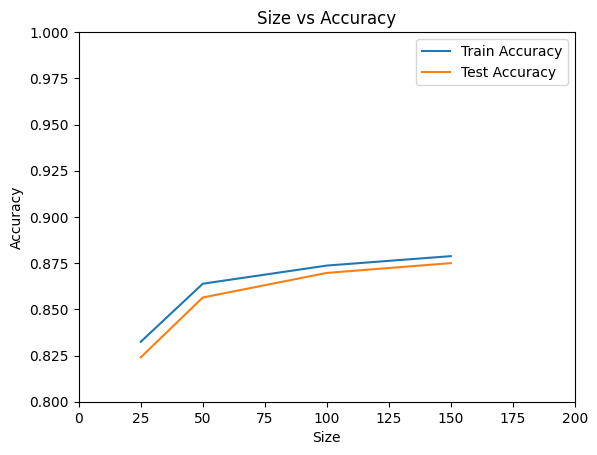

In [ ]:
plt.plot(df_accuracy["size"], df_accuracy["train_accuracy"], label="Train Accuracy")
plt.plot(df_accuracy["size"], df_accuracy["test_accuracy"], label="Test Accuracy")
plt.title("Size vs Accuracy")
plt.xlabel("Size")
plt.xlim([0, 200])
plt.ylim([0.8, 1.0])
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Size(vector_size) variable in gensim word2vec algorithm represents number of dimensions each word embedding vector is going to have. In our dataset, we can clearly see that both train and test accuracy of logistic regression classifier increases as we increase the dimension of vector embeddings. In general, with the abundance of data, having higher dimensional embedding vectors representing each word enables us to store more information about the word.

### Similarly, we will vary the window size between [2, 3, 5, 10], and answer the same questions as before.

In [ ]:
### Training a word2vec model with window size of 2
imdb_model_2 = gensim.models.Word2Vec(reviews_list_train, vector_size=100, window=2, min_count=5, sg=1, workers=10)
imdb_model_2.train(reviews_list_train, total_examples=len(reviews_list_train), epochs=10)

### Training a word2vec model with window size of 3
imdb_model_3 = gensim.models.Word2Vec(reviews_list_train, vector_size=100, window=3, min_count=5, sg=1, workers=10)
imdb_model_3.train(reviews_list_train, total_examples=len(reviews_list_train), epochs=10)

### Training a word2vec model with window size of 5
imdb_model_5 = gensim.models.Word2Vec(reviews_list_train, vector_size=100, window=5, min_count=5, sg=1, workers=10)
imdb_model_5.train(reviews_list_train, total_examples=len(reviews_list_train), epochs=10)

### Training a word2vec model with window size of 10
imdb_model_10 = gensim.models.Word2Vec(reviews_list_train, vector_size=100, window=10, min_count=5, sg=1, workers=10)
imdb_model_10.train(reviews_list_train, total_examples=len(reviews_list_train), epochs=10)

2023-03-13 16:15:35,398 : INFO : collecting all words and their counts
2023-03-13 16:15:35,415 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 16:15:37,719 : INFO : PROGRESS: at sentence #10000, processed 2222974 words, keeping 51349 word types
2023-03-13 16:15:38,872 : INFO : PROGRESS: at sentence #20000, processed 4455938 words, keeping 68523 word types
2023-03-13 16:15:40,292 : INFO : PROGRESS: at sentence #30000, processed 6710535 words, keeping 80941 word types
2023-03-13 16:15:41,275 : INFO : collected 90934 word types from a corpus of 8954936 raw words and 40000 sentences
2023-03-13 16:15:41,279 : INFO : Creating a fresh vocabulary
2023-03-13 16:15:41,596 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 35603 unique words (39.15% of original 90934, drops 55331)', 'datetime': '2023-03-13T16:15:41.593775', 'gensim': '4.3.1', 'python': '3.9.6 (default, Oct 18 2022, 12:41:40) \n[Clang 14.0.0 (clang-1400.0.29.202)]', 'plat

(67360429, 89549360)

In [ ]:
### Getting review to vector embeddings
review2vec_2 = []
for i in range(len(reviews_list_train)):
    review_vector = []
    for word in reviews_list_train[i]:
        if word in imdb_model_2.wv:
            review_vector.append(imdb_model_2.wv[word])
    review2vec_2.append(np.mean(review_vector, axis=0))

print(len(review2vec_2)==len(reviews_list_train))

review2vec_test_2 = []
for i in range(len(reviews_list_test)):
    review_vector = []
    for word in reviews_list_test[i]:
        if word in imdb_model_2.wv:
            review_vector.append(imdb_model_2.wv[word])
    review2vec_test_2.append(np.mean(review_vector, axis=0))

print(len(review2vec_test_2)==len(reviews_list_test))


True
True


In [ ]:
clf5 = LogisticRegression(max_iter=500)
clf5.fit(review2vec_2, y_train)

LogisticRegression(max_iter=500)

In [ ]:
### Alternate way to get test accuracy score
score_test_2 = clf5.score(review2vec_test_2, y_test)
print(f"Test Accuracy Score: {score_test_2}")

### Alternate way to get Train accuracy score
score_train_2 = clf5.score(review2vec_2, y_train)
print(f"Train Accuracy Score: {score_train_2}")

Test Accuracy Score: 0.8515
Train Accuracy Score: 0.85835


In [ ]:
window_list = [2]
test_a_list = [score_test_2]
train_a_list = [score_train_2]

In [ ]:
### Getting remaining review to vector embeddings
review2vec_3 = []
for i in range(len(reviews_list_train)):
    review_vector = []
    for word in reviews_list_train[i]:
        if word in imdb_model_3.wv:
            review_vector.append(imdb_model_3.wv[word])
    review2vec_3.append(np.mean(review_vector, axis=0))

print(len(review2vec_3)==len(reviews_list_train))

review2vec_test_3 = []
for i in range(len(reviews_list_test)):
    review_vector = []
    for word in reviews_list_test[i]:
        if word in imdb_model_3.wv:
            review_vector.append(imdb_model_3.wv[word])
    review2vec_test_3.append(np.mean(review_vector, axis=0))

print(len(review2vec_test_3)==len(reviews_list_test))


review2vec_5 = []
for i in range(len(reviews_list_train)):
    review_vector = []
    for word in reviews_list_train[i]:
        if word in imdb_model_5.wv:
            review_vector.append(imdb_model_5.wv[word])
    review2vec_5.append(np.mean(review_vector, axis=0))

print(len(review2vec_5)==len(reviews_list_train))

review2vec_test_5 = []
for i in range(len(reviews_list_test)):
    review_vector = []
    for word in reviews_list_test[i]:
        if word in imdb_model_5.wv:
            review_vector.append(imdb_model_5.wv[word])
    review2vec_test_5.append(np.mean(review_vector, axis=0))

print(len(review2vec_test_5)==len(reviews_list_test))


review2vec_10 = []
for i in range(len(reviews_list_train)):
    review_vector = []
    for word in reviews_list_train[i]:
        if word in imdb_model_10.wv:
            review_vector.append(imdb_model_10.wv[word])
    review2vec_10.append(np.mean(review_vector, axis=0))

print(len(review2vec_10)==len(reviews_list_train))

review2vec_test_10 = []
for i in range(len(reviews_list_test)):
    review_vector = []
    for word in reviews_list_test[i]:
        if word in imdb_model_10.wv:
            review_vector.append(imdb_model_10.wv[word])
    review2vec_test_10.append(np.mean(review_vector, axis=0))

print(len(review2vec_test_10)==len(reviews_list_test))






True
True
True
True
True
True


In [ ]:
### Fitting a logistic regression
clf6 = LogisticRegression(max_iter=500)
clf6.fit(review2vec_3, y_train)

### Getting Accuracy
### Alternate way to get test accuracy score
score_test_3 = clf6.score(review2vec_test_3, y_test)
print(f"Test Accuracy Score: {score_test_3}")

### Alternate way to get Train accuracy score
score_train_3 = clf6.score(review2vec_3, y_train)
print(f"Train Accuracy Score: {score_train_3}")

window_list.append(3)
test_a_list.append(score_test_3)
train_a_list.append(score_train_3)

Test Accuracy Score: 0.8596
Train Accuracy Score: 0.865125


In [ ]:
### Fitting a logistic regression
clf7 = LogisticRegression(max_iter=500)
clf7.fit(review2vec_5, y_train)

### Getting Accuracy
### Alternate way to get test accuracy score
score_test_5 = clf7.score(review2vec_test_5, y_test)
print(f"Test Accuracy Score: {score_test_5}")

### Alternate way to get Train accuracy score
score_train_5 = clf7.score(review2vec_5, y_train)
print(f"Train Accuracy Score: {score_train_5}")

window_list.append(5)
test_a_list.append(score_test_5)
train_a_list.append(score_train_5)

Test Accuracy Score: 0.8704
Train Accuracy Score: 0.8732


In [ ]:
### Fitting a logistic regression
clf8 = LogisticRegression(max_iter=500)
clf8.fit(review2vec_10, y_train)

### Getting Accuracy
### Alternate way to get test accuracy score
score_test_10 = clf8.score(review2vec_test_10, y_test)
print(f"Test Accuracy Score: {score_test_10}")

### Alternate way to get Train accuracy score
score_train_10 = clf8.score(review2vec_10, y_train)
print(f"Train Accuracy Score: {score_train_10}")

window_list.append(10)
test_a_list.append(score_test_10)
train_a_list.append(score_train_10)

Test Accuracy Score: 0.8768
Train Accuracy Score: 0.881225


In [ ]:
df_accuracy2 = pd.DataFrame()

df_accuracy2["window"]= window_list
df_accuracy2["test_accuracy"]= test_a_list
df_accuracy2["train_accuracy"]= train_a_list

In [ ]:
df_accuracy2

window  test_accuracy  train_accuracy
0       2         0.8515        0.858350
1       3         0.8596        0.865125
2       5         0.8704        0.873200
3      10         0.8768        0.881225

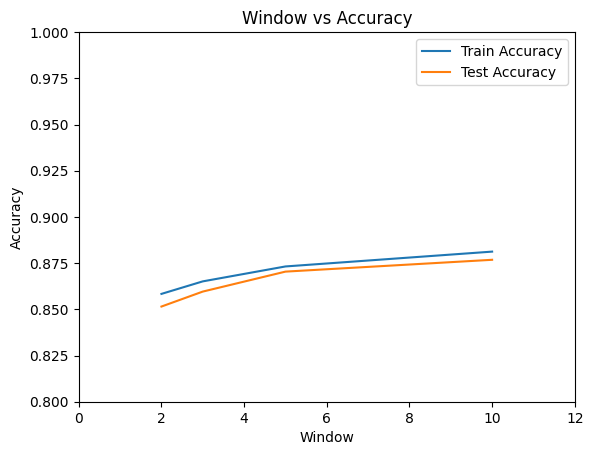

In [ ]:
plt.plot(df_accuracy2["window"], df_accuracy2["train_accuracy"], label="Train Accuracy")
plt.plot(df_accuracy2["window"], df_accuracy2["test_accuracy"], label="Test Accuracy")
plt.title("Window vs Accuracy")
plt.xlabel("Window")
plt.xlim([0,12])
plt.ylim([0.8, 1.0])
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Window variable in gensim word2vec algorithm represents number of words algortihm considers to the left and right of focal word. In our dataset, we can clearly see that both train and test accuracy of logistic regression classifier increases as we increase the window size. In theory, a smaller window should give us terms that are more related. Again, since our data is not sparse, then the window size should not matter too much, as long as it’s not overly narrow or overly broad. Here we can see that accuracy increases as the window increases because, the algorithm probably understands the context in which the word appears better with bigger window size.